In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pytz
import numpy as np
from matplotlib.patches import Rectangle
from IPython.display import display

orange = [24,25,27,28]

bookings = pd.read_json("../../chatbot_data/bookings/bookings3-11-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

# switch to a faster method of parsing datetime strings by inferring the format
bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True).dt.floor('S')
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True).dt.floor('S')
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True).dt.floor('S')

coordinationStartDate = datetime.datetime(2023,10,12,0,0,0,0,tzinfo=pytz.timezone('UTC'))
validBookings = bookings.loc[bookings['start']>= coordinationStartDate] 

orgBookings = validBookings.loc[validBookings['user'].isin(orange)].copy() 
orgBookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
89,2023-10-12 11:00:00+00:00,1800,housework,None,yes,0.077454,34,electricity_consumption,25,2023-10-12 10:11:23+00:00,2023-10-12 10:11:23+00:00
90,2023-10-12 11:00:00+00:00,3600,lunch,None,yes,0.074525,34,electricity_consumption,25,2023-10-12 10:13:01+00:00,2023-10-12 10:13:01+00:00
91,2023-10-12 12:00:00+00:00,2700,showering,None,yes,0.149816,34,electricity_consumption,25,2023-10-12 10:15:06+00:00,2023-10-12 10:15:06+00:00
92,2023-10-12 11:00:00+00:00,1800,hob,None,yes,0.232136,28,electricity_consumption,24,2023-10-12 10:59:30+00:00,2023-10-12 10:59:30+00:00
93,2023-10-12 14:00:00+00:00,1800,laundry,None,yes,0.014146,35,electricity_consumption,28,2023-10-12 13:46:01+00:00,2023-10-12 13:46:01+00:00
...,...,...,...,...,...,...,...,...,...,...,...
213,2023-11-01 12:00:00+00:00,1800,hob,,yes,0.230000,28,electricity_consumption,24,2023-11-01 09:04:49+00:00,2023-11-01 09:04:49+00:00
214,2023-11-01 10:00:00+00:00,3600,computer,,yes,0.100000,28,electricity_consumption,24,2023-11-01 09:05:28+00:00,2023-11-01 09:05:28+00:00
215,2023-11-01 10:00:00+00:00,3600,computer,,yes,0.100000,28,electricity_consumption,24,2023-11-01 09:05:57+00:00,2023-11-01 09:05:57+00:00
216,2023-11-01 11:00:00+00:00,3600,computer,,yes,0.100000,28,electricity_consumption,24,2023-11-01 09:06:34+00:00,2023-11-01 09:06:34+00:00


86 bookings were made in total.


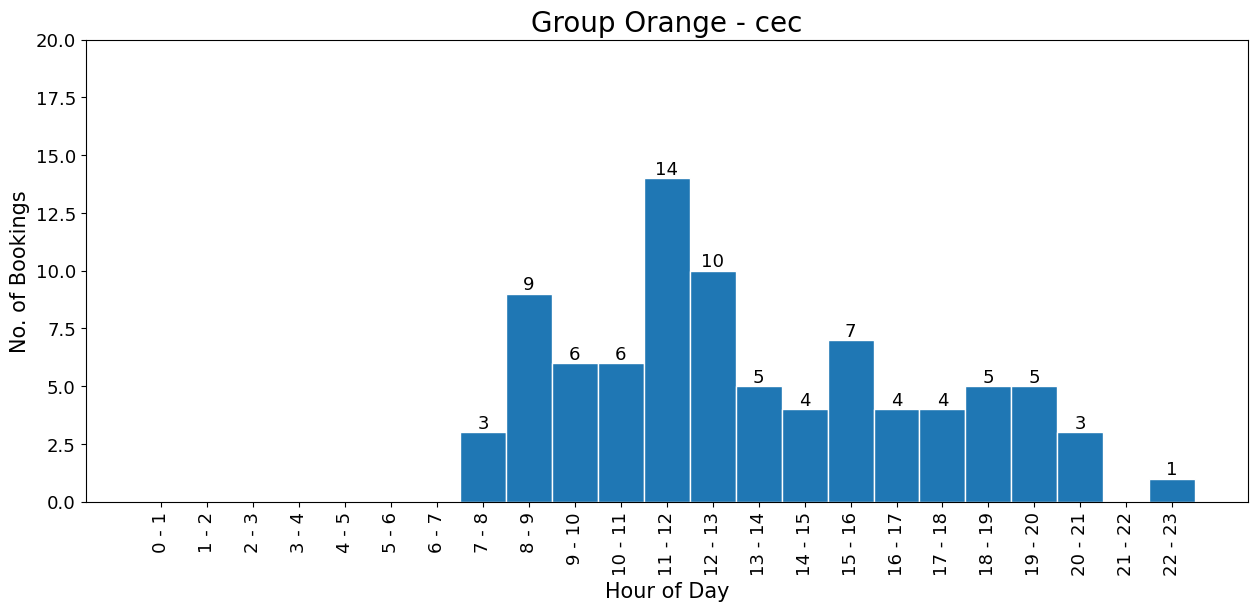

In [3]:
# Extract the hour from 'start'
orgBookings['hour'] = orgBookings['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(orgBookings['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(15, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Group Orange - cec", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(orgBookings)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 20  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('cec_group_orange_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

15 bookings were made in total.


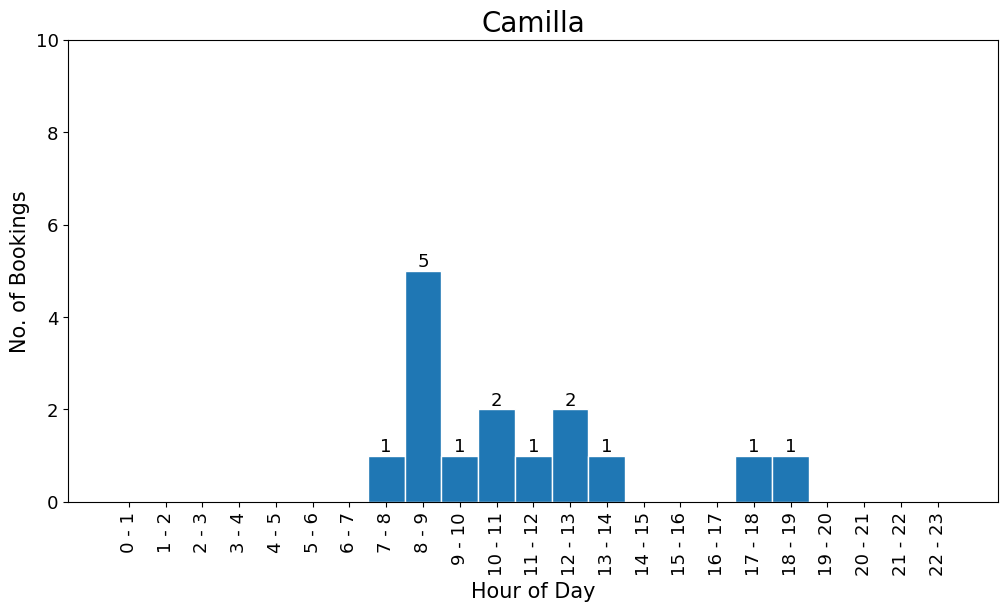

In [4]:
# User 27

bookingsUser27 = bookings.loc[bookings['user'] == 27].copy()

# Extract the hour from 'start'
bookingsUser27['hour'] = bookingsUser27['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser27['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Camilla", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser27)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('camilla_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

39 bookings were made in total.


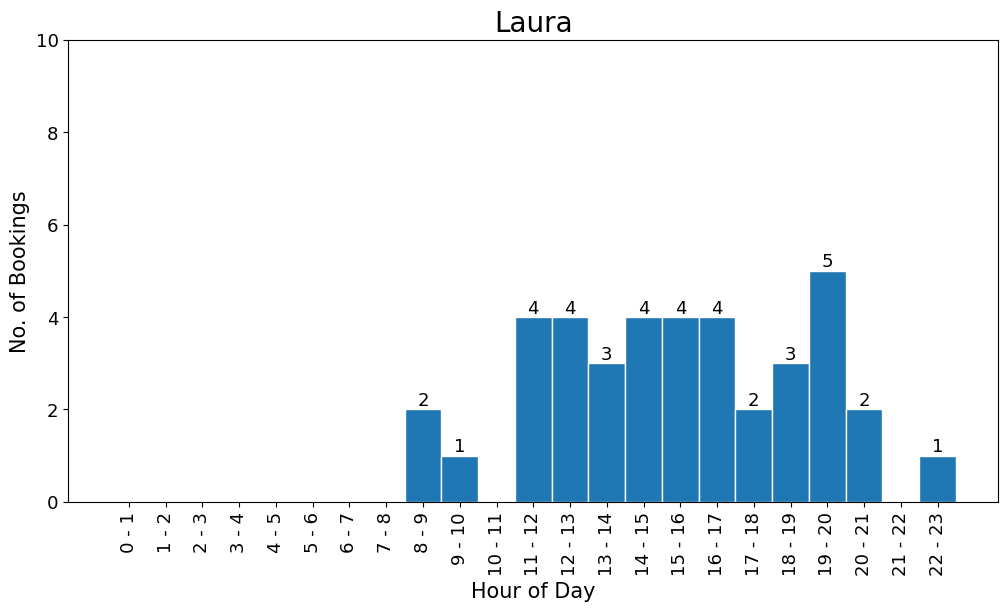

In [5]:
# User 28

bookingsUser28 = bookings.loc[bookings['user'] == 28].copy()

# Extract the hour from 'start'
bookingsUser28['hour'] = bookingsUser28['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser28['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Laura", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser28)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('laura_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

14 bookings were made in total.


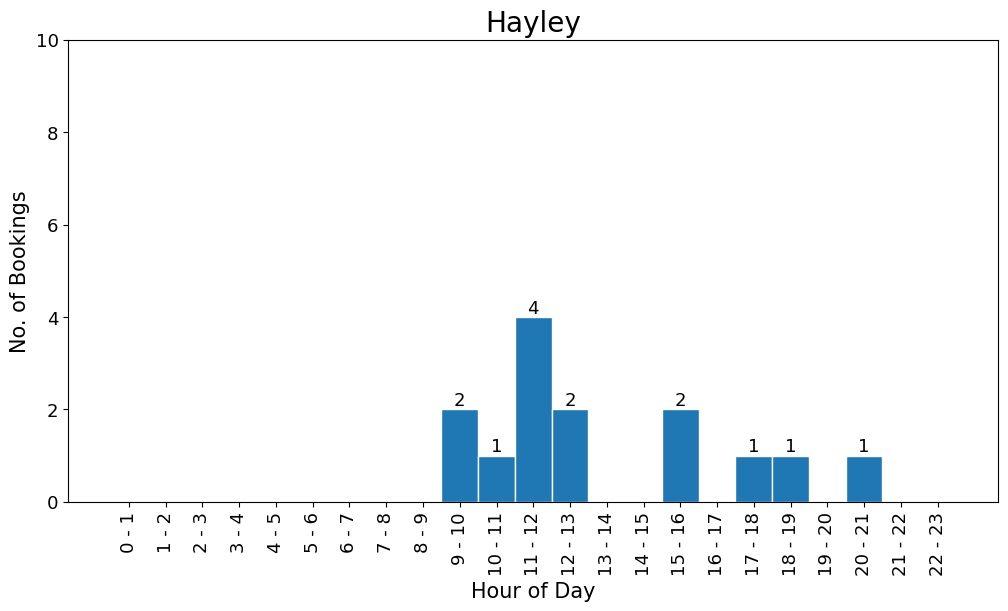

In [6]:
# User 25

bookingsUser25 = bookings.loc[bookings['user'] == 25].copy()

# Extract the hour from 'start'
bookingsUser25['hour'] = bookingsUser25['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser25['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Hayley", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser25)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('hayley_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

18 bookings were made in total.


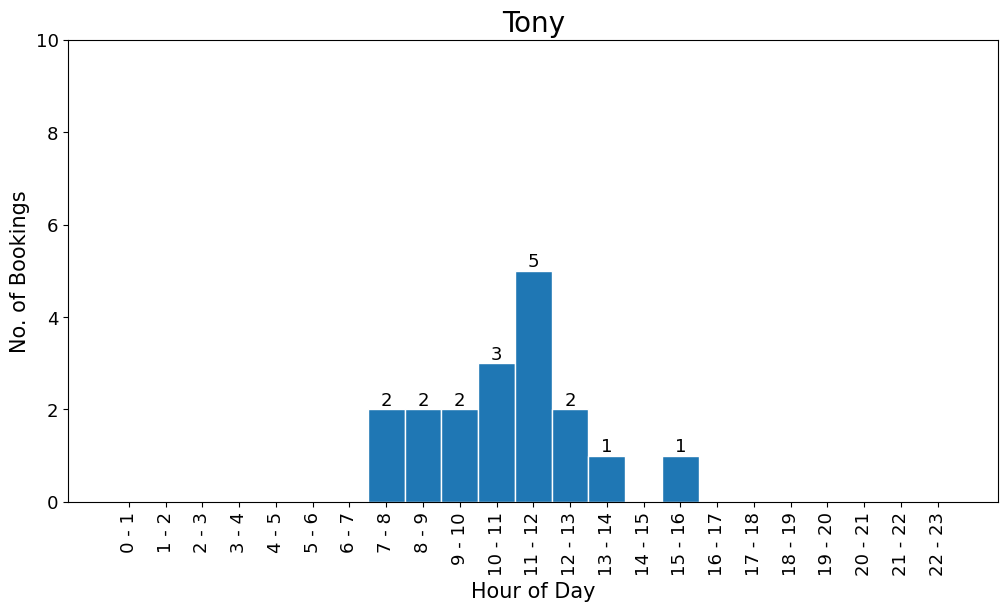

In [7]:
# User 24

bookingsUser24 = bookings.loc[bookings['user'] == 24].copy()

# Extract the hour from 'start'
bookingsUser24['hour'] = bookingsUser24['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser24['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Tony", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser24)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('tony_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()